In [1]:
from maze import Maze
from position import Position
import search as Search
import search_hard as SearchHard
import utilities as Util 
import matplotlib.pyplot as pltwe notife
import numpy as np
import statistics
import seaborn as sns 

# Generating Hard Mazes

In this case, we will use a hill climbing algorithm to arrive as a local maxima for the hardest maze.  We have designed the function to adjust the metric and search algorithm we want to use.  

To compare better with the control (trivial case), we will attempt to match the percentage of occupied cells.  In our hill climbing, we will start with a seed maze that is less concentrated with occupied cells and add one occupied cell per iteration.  We want the final maze to be approximately the same p as that used in the control case.  In the control case, we used p=0.2.  In the hill climbing, we will use p=0.15 for the seed maze. 

In [2]:
print("The number of occupied cells we aim to add is ", 0.2*20**2 - 0.15*20**2)

The number of occupied cells we aim to add is  20.0


Since we aim to add 20 occupied cells, we expect the hill climbing to execute for approximately 20 iterations.  

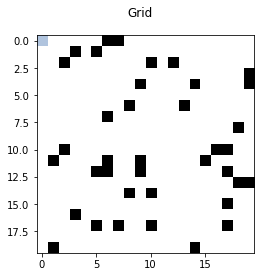

In [3]:
dim = 20
p = 0.15 
q = 0

maze = Maze(dim, p, q)
seed_state = SearchHard.HardState(maze)
f = maze.draw_grid()

inital_state = Position(0,0) 
goal_state = Position(dim-1, dim-1)

# Maximizing A* search using Manhattan distance 



path length:		39
total nodes expanded:	323
max fringe size:	33

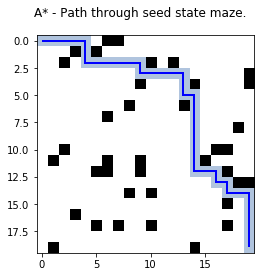

In [28]:
_, p, m = Search.A_star_man(seed_state.maze, inital_state, goal_state)
f = seed_state.maze.draw_path(p, plot_title="A* - Path through seed state maze.")
m

## Max Fringe Size 

The metric function for this search is maximum fringe size 

In [5]:
hardest_state, metrics_list = SearchHard.hill_climb(seed_state, 25, 
                                      metric_function=SearchHard.max_fringe_size, 
                                      log=True)

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..iter 7..iter 8..iter 9..iter 10..iter 11..iter 12..iter 13..iter 14..iter 15..iter 16..iter 17..iter 18..**At a local maxima...metric val:80
**Resetting...1 of 20.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..iter 7..iter 8..iter 9..iter 10..iter 11..iter 12..iter 13..iter 14..iter 15..iter 16..iter 17..iter 18..iter 19..iter 20..iter 21..iter 22..**At a local maxima...metric val:84
**Resetting...2 of 20.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..iter 7..iter 8..iter 9..iter 10..iter 11..iter 12..iter 13..iter 14..iter 15..iter 16..iter 17..iter 18..iter 19..iter 20..iter 21..iter 22..**At a local maxima...metric val:83
**Resetting...3 of 20.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..iter 7..iter 8..iter 9..iter 10..iter 11..iter 12..iter 13..iter 14..iter 15..iter 16..iter 17..iter 18..iter 19..iter 20..iter 21..iter 22..**At a local maxima...metric val:88
**Resetting...4 of 20.

iter 0..

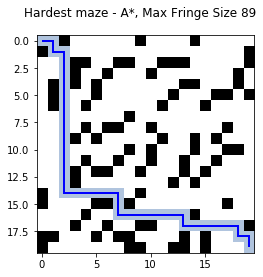

In [6]:
_, p, m = Search.A_star_man(hardest_state.maze, inital_state, goal_state)
f = hardest_state.maze.draw_path(p, plot_title="Hardest maze - A*, Max Fringe Size {}".format(m.max_fringe_size))

In [7]:
m

path length:		39
total nodes expanded:	175
max fringe size:	89

Text(0, 0.5, 'Max Fringe Size')

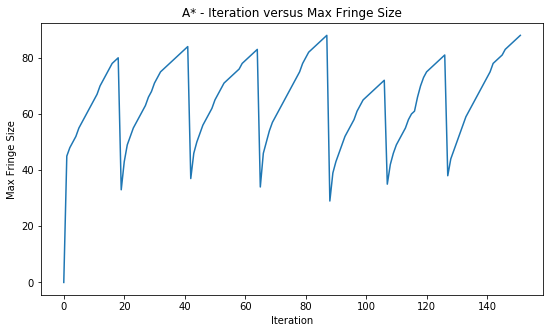

In [8]:
fig = plt.figure(figsize=(9,5))
f = sns.lineplot(np.arange(len(metrics_list)), metrics_list)
f.set_title('A* - Iteration versus Max Fringe Size')
f.set_xlabel("Iteration")
f.set_ylabel('Max Fringe Size')

## Total Nodes Expanded  
The metric for this search is maximizing total nodes expanded 

In [9]:
hardest_state_nodes_expnd, metrics_list_nodes_expnd = SearchHard.hill_climb(seed_state, 20, 
                                      metric_function=SearchHard.total_nodes_expanded,
                                      reset_limit=20, 
                                      log=True)

_, p, m = Search.A_star_man(hardest_state_nodes_expnd.maze, inital_state, goal_state)
f = hardest_state_nodes_expnd.maze.draw_path(p, plot_title="Hardest maze - A*, Total Nodes Expnd {}".format(m.total_nodes_expanded))

iter 0..iter 1..**At a local maxima...metric val:323
**Resetting...1 of 20.

iter 0..**At a local maxima...metric val:290
**Resetting...2 of 20.

iter 0..**At a local maxima...metric val:297
**Resetting...3 of 20.

iter 0..**At a local maxima...metric val:276
**Resetting...4 of 20.

iter 0..**At a local maxima...metric val:243
**Resetting...5 of 20.

iter 0..**At a local maxima...metric val:228
**Resetting...6 of 20.

iter 0..iter 1..**At a local maxima...metric val:256
**Resetting...7 of 20.

iter 0..**At a local maxima...metric val:306
**Resetting...8 of 20.

iter 0..**At a local maxima...metric val:229
**Resetting...9 of 20.

iter 0..**At a local maxima...metric val:299
**Resetting...10 of 20.

iter 0..**At a local maxima...metric val:273
**Resetting...11 of 20.

iter 0..**At a local maxima...metric val:298
**Resetting...12 of 20.

iter 0..**At a local maxima...metric val:309
**Resetting...13 of 20.

iter 0..**At a local maxima...metric val:164
**Resetting...14 of 20.

iter 0..**At 

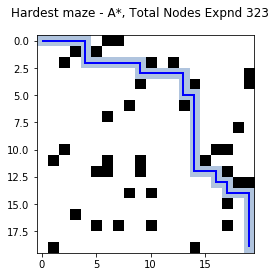

In [11]:
m

path length:		39
total nodes expanded:	323
max fringe size:	33

Text(0, 0.5, 'Total Nodes Expanded')

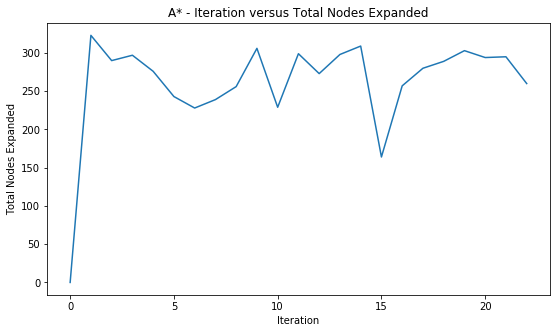

In [12]:
fig = plt.figure(figsize=(9,5))
f = sns.lineplot(np.arange(len(metrics_list_nodes_expnd)), metrics_list_nodes_expnd)
f.set_title('A* - Iteration versus Total Nodes Expanded')
f.set_xlabel("Iteration")
f.set_ylabel('Total Nodes Expanded')

## Path Length 
The metric we are maximizing now is path length 

iter 0..iter 1..**At a local maxima...metric val:39
**Resetting...1 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...2 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...3 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...4 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...5 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...6 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...7 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...8 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...9 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...10 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...11 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...12 of 20.

iter 0..iter 1..iter 2..iter 3..**At a local maxima...metric val:45
**Resetting...13 of 20.

iter 0..**At a local maxima...metric val:39
**Resetting...14 of 20.

iter 0..**A

Text(0, 0.5, 'Path Length')

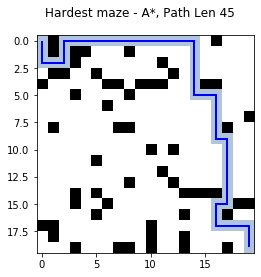

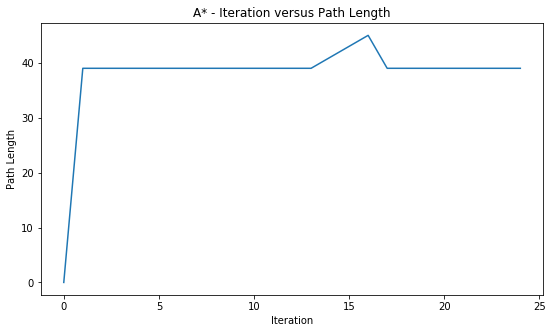

In [13]:
hardest_state_path_len, metrics_list_path_len = SearchHard.hill_climb(seed_state, 20, 
                                      metric_function=SearchHard.path_length,
                                      reset_limit=20, 
                                      log=True)

_, p, m = Search.A_star_man(hardest_state_path_len.maze, inital_state, goal_state)
f = hardest_state_path_len.maze.draw_path(p, plot_title="Hardest maze - A*, Path Len {}".format(m.path_length))

fig = plt.figure(figsize=(9,5))
f = sns.lineplot(np.arange(len(metrics_list_path_len)), metrics_list_path_len)
f.set_title('A* - Iteration versus Path Length')
f.set_xlabel("Iteration")
f.set_ylabel('Path Length')

In [14]:
m

path length:		45
total nodes expanded:	278
max fringe size:	33

# Maximizing DFS 

path length:		229
total nodes expanded:	245
max fringe size:	189

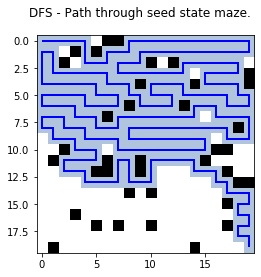

In [27]:
_, p, m = Search.dfs(seed_state.maze, inital_state, goal_state)
f = seed_state.maze.draw_path(p, plot_title="DFS - Path through seed state maze.")
m

## Path Length

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..iter 7..iter 8..**At a local maxima...metric val:329
**Resetting...1 of 5.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..iter 7..iter 8..iter 9..iter 10..iter 11..**At a local maxima...metric val:297
**Resetting...2 of 5.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..iter 7..iter 8..**At a local maxima...metric val:299
**Resetting...3 of 5.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..**At a local maxima...metric val:303
**Resetting...4 of 5.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..iter 7..iter 8..**At a local maxima...metric val:309
**Resetting...5 of 5.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..iter 7..iter 8..iter 9..iter 10..**At a local maxima...metric val:291
**Max reset limit reached.  Returning best of local maximia.


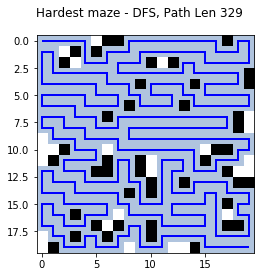

In [16]:
hardest_state_dfs_path_len, metrics_list_dfs_path_len = SearchHard.hill_climb(seed_state, 20, 
                                      search_algo=Search.dfs, 
                                      metric_function=SearchHard.path_length,
                                      reset_limit=5, 
                                      log=True)

_, p, m = Search.dfs(hardest_state_dfs_path_len.maze, inital_state, goal_state)
f = hardest_state_dfs_path_len.maze.draw_path(p, plot_title="Hardest maze - DFS, Path Len {}".format(m.path_length))


In [17]:
m

path length:		329
total nodes expanded:	344
max fringe size:	249

Text(0, 0.5, 'Path Length')

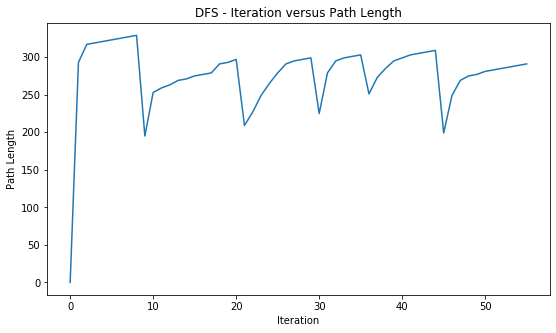

In [18]:
fig = plt.figure(figsize=(9,5))
f = sns.lineplot(np.arange(len(metrics_list_dfs_path_len)), metrics_list_dfs_path_len)
f.set_title('DFS - Iteration versus Path Length')
f.set_xlabel("Iteration")
f.set_ylabel('Path Length')

## Maximal Fringe Size 

iter 0..iter 1..iter 2..**At a local maxima...metric val:264
**Resetting...1 of 5.

iter 0..iter 1..iter 2..**At a local maxima...metric val:209
**Resetting...2 of 5.

iter 0..iter 1..**At a local maxima...metric val:213
**Resetting...3 of 5.

iter 0..iter 1..**At a local maxima...metric val:210
**Resetting...4 of 5.

iter 0..iter 1..iter 2..**At a local maxima...metric val:209
**Resetting...5 of 5.

iter 0..**At a local maxima...metric val:193
**Max reset limit reached.  Returning best of local maximia.


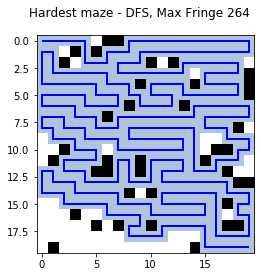

In [19]:
hardest_state_dfs_max_fringe, metrics_list_dfs_max_fringe = SearchHard.hill_climb(seed_state, 20, 
                                      search_algo=Search.dfs, 
                                      metric_function=SearchHard.max_fringe_size,
                                      reset_limit=5, 
                                      log=True)

_, p, m = Search.dfs(hardest_state_dfs_max_fringe.maze, inital_state, goal_state)
f = hardest_state_dfs_max_fringe.maze.draw_path(p, plot_title="Hardest maze - DFS, Max Fringe {}".format(m.max_fringe_size))


In [20]:
m

path length:		303
total nodes expanded:	355
max fringe size:	264

Text(0, 0.5, 'Max Fringe Size')

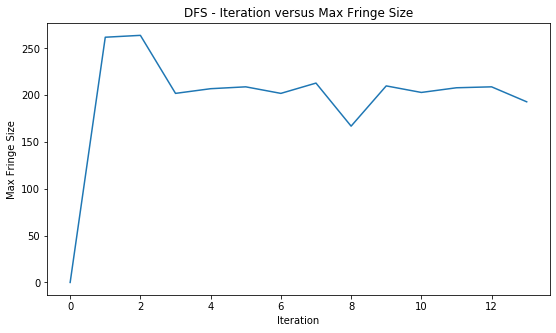

In [21]:
fig = plt.figure(figsize=(9,5))
f = sns.lineplot(np.arange(len(metrics_list_dfs_max_fringe)), metrics_list_dfs_max_fringe)
f.set_title('DFS - Iteration versus Max Fringe Size')
f.set_xlabel("Iteration")
f.set_ylabel('Max Fringe Size')

## Total Nodes Expanded 

iter 0..iter 1..**At a local maxima...metric val:359
**Resetting...1 of 5.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..iter 6..**At a local maxima...metric val:329
**Resetting...2 of 5.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..**At a local maxima...metric val:323
**Resetting...3 of 5.

iter 0..iter 1..**At a local maxima...metric val:350
**Resetting...4 of 5.

iter 0..iter 1..iter 2..**At a local maxima...metric val:350
**Resetting...5 of 5.

iter 0..iter 1..iter 2..iter 3..iter 4..iter 5..**At a local maxima...metric val:326
**Max reset limit reached.  Returning best of local maximia.


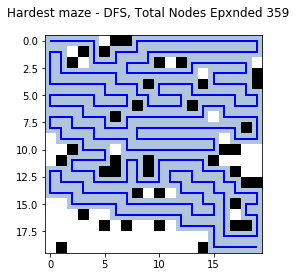

In [22]:
hardest_state_dfs_nodes_expnd, metrics_list_dfs_nodes_expnded = SearchHard.hill_climb(seed_state, 20, 
                                      search_algo=Search.dfs, 
                                      metric_function=SearchHard.total_nodes_expanded,
                                      reset_limit=5, 
                                      log=True)

_, p, m = Search.dfs(hardest_state_dfs_nodes_expnd.maze, inital_state, goal_state)
f = hardest_state_dfs_nodes_expnd.maze.draw_path(p, plot_title="Hardest maze - DFS, Total Nodes Epxnded {}".format(m.total_nodes_expanded))


In [23]:
m

path length:		293
total nodes expanded:	359
max fringe size:	262

Text(0, 0.5, 'Total Nodes Expanded')

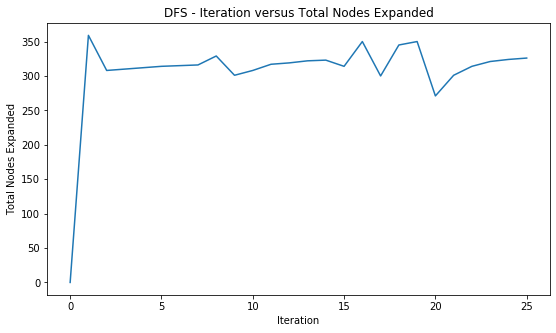

In [24]:
fig = plt.figure(figsize=(9,5))
f = sns.lineplot(np.arange(len(metrics_list_dfs_nodes_expnded)), metrics_list_dfs_nodes_expnded)
f.set_title('DFS - Iteration versus Total Nodes Expanded')
f.set_xlabel("Iteration")
f.set_ylabel('Total Nodes Expanded')

# Analysis 

Bar plot made to compare the strategies.  Values are hard-coded in because they are spread across notebooks. 

In [118]:
max_fringe_size_Astar = {'triv_Astar': 62, 
                         'seed_Astar': 33, 
                        'hill_Astar': 89}

path_length_Astar = {'triv_Astar': 49, 
                         'seed_Astar': 39, 
                        'hill_Astar': 45}
                    
nodes_expnd_Astar = {'triv_Astar': 313, 
                         'seed_Astar': 315, 
                        'hill_Astar': 323}
                    

Text(0.5, 1.0, 'Comparing hard mazes generated with Astar using Max Fringe Size metric')

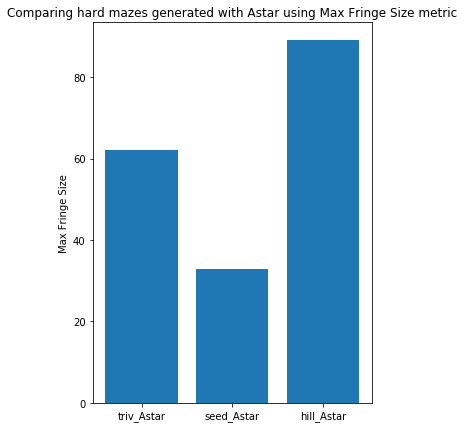

In [124]:
plt.figure(figsize=(5, 7))
plt.bar(range(len(max_fringe_size_Astar)), list(max_fringe_size_Astar.values()))
plt.xticks([0, 1, 2], ['triv_Astar', 'seed_Astar', 'hill_Astar'])
plt.ylabel('Max Fringe Size')
plt.title('Comparing hard mazes generated with Astar using Max Fringe Size metric')

Text(0.5, 1.0, 'Comparing hard mazes generated with Astar using Path Length metric')

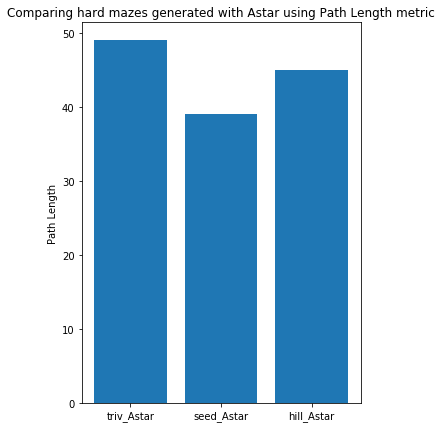

In [125]:
plt.figure(figsize=(5, 7))
plt.bar(range(len(path_length_Astar)), list(path_length_Astar.values()))
plt.xticks([0, 1, 2], ['triv_Astar', 'seed_Astar', 'hill_Astar'])
plt.ylabel('Path Length')
plt.title('Comparing hard mazes generated with Astar using Path Length metric')

Text(0.5, 1.0, 'Comparing hard mazes generated with Astar using Total Nodes Expanded metric')

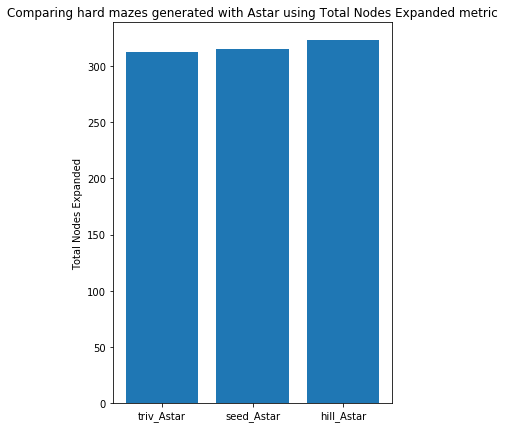

In [126]:
plt.figure(figsize=(5, 7))
plt.bar(range(len(nodes_expnd_Astar)), list(nodes_expnd_Astar.values()))
plt.xticks([0, 1, 2], ['triv_Astar', 'seed_Astar', 'hill_Astar'])
plt.ylabel('Total Nodes Expanded')
plt.title('Comparing hard mazes generated with Astar using Total Nodes Expanded metric')

DFS

In [ ]:
max_fringe_size_dfs = {'triv_Astar': 229, 
                         'seed_Astar': 189, 
                        'hill_Astar': 264}

path_length_dfs = {'triv_Astar': 301, 
                         'seed_Astar': 229, 
                        'hill_Astar': 329}
                    
nodes_expnd_dfs = {'triv_Astar': 336, 
                         'seed_Astar': 245, 
                        'hill_Astar': 359}
                        

Text(0.5, 1.0, 'Comparing hard mazes generated with DFS using Max Fringe Size metric')

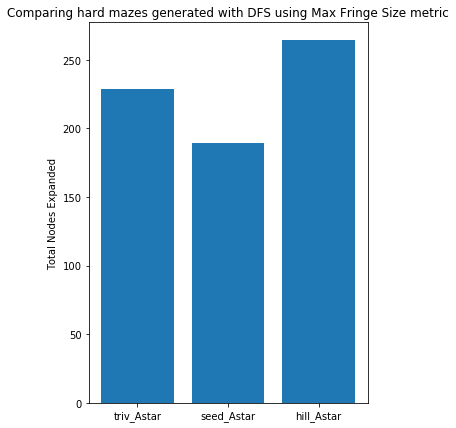

In [127]:
plt.figure(figsize=(5, 7))
plt.bar(range(len(max_fringe_size_dfs)), list(max_fringe_size_dfs.values()))
plt.xticks([0, 1, 2], ['triv_Astar', 'seed_Astar', 'hill_Astar'])
plt.ylabel('Max Fringe Size')
plt.title('Comparing hard mazes generated with DFS using Max Fringe Size metric')

Text(0.5, 1.0, 'Comparing hard mazes generated with DFS using Path Length metric')

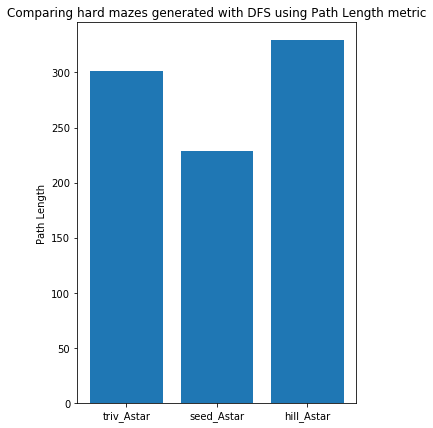

In [128]:
plt.figure(figsize=(5, 7))
plt.bar(range(len(path_length_dfs)), list(path_length_dfs.values()))
plt.xticks([0, 1, 2], ['triv_Astar', 'seed_Astar', 'hill_Astar'])
plt.ylabel('Path Length')
plt.title('Comparing hard mazes generated with DFS using Path Length metric')

Text(0.5, 1.0, 'Comparing hard mazes generated with DFS using Total Nodes Expanded metric')

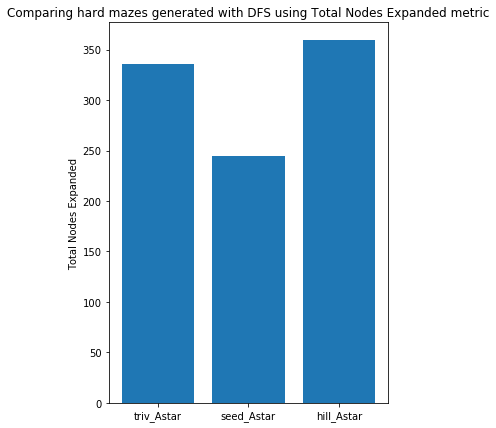

In [129]:
plt.figure(figsize=(5, 7))
plt.bar(range(len(nodes_expnd_dfs)), list(nodes_expnd_dfs.values()))
plt.xticks([0, 1, 2], ['triv_Astar', 'seed_Astar', 'hill_Astar'])
plt.ylabel('Total Nodes Expanded')
plt.title('Comparing hard mazes generated with DFS using Total Nodes Expanded metric')